In [81]:
import import_ipynb
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop
import keras_preprocessing
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

In [71]:
training_datagen = ImageDataGenerator (rescale = 1./255)
validation_datagen = ImageDataGenerator (rescale = 1./255)

In [72]:
train_dir=r"C:\Users\IIOPR\Desktop\image_classification\project_image\image_split\train"
train_gen = training_datagen.flow_from_directory (train_dir,
                                                 target_size=(150, 150),
                                                 class_mode="categorical")

Found 66 images belonging to 3 classes.


In [73]:
val_dir=r"C:\Users\IIOPR\Desktop\image_classification\project_image\image_split\val"
val_gen = validation_datagen.flow_from_directory (val_dir,
                                                 target_size=(150, 150),
                                                 class_mode="categorical")

Found 13 images belonging to 3 classes.


In [74]:
import os
import tensorflow.keras as keras

In [75]:
train_dog_dir=r"C:\Users\IIOPR\Desktop\image_classification\project_image\image_split\train\dog"
number_dog_train=len(os.listdir(train_dog_dir))
print("total dogs are", number_dog_train)

train_flower_dir=r"C:\Users\IIOPR\Desktop\image_classification\project_image\image_split\train\flower"
number_flower_train=len(os.listdir(train_flower_dir))
print("total flowers are", number_flower_train)

total dogs are 61
total flowers are 5


In [76]:
dog_names=os.listdir(train_dog_dir)
dog_names[:10]

flower_names=os.listdir(train_flower_dir)
flower_names[:5]

['1447169929799.jpeg',
 'colorful-of-dahlia-pink-flower-in-beautiful-garden-royalty-free-image-825886130-1554743243.jpg',
 'daisy.jpg',
 'pexels-photo-85773.jpeg',
 'photo-1533907650686-70576141c030.jpg']

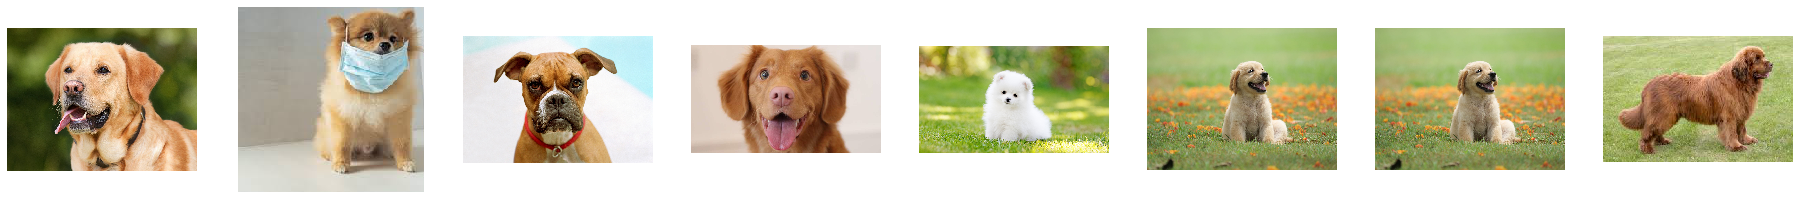

In [77]:
nrows =8
ncols =8
pic_index =0

fig = plt.gcf()
fig.set_size_inches (ncols*4, nrows*4)
pic_index +=8

#flower_pic = [os.path.join(train_flower_dir,fname)for fname in flower_names[pic_index-5:pic_index]]
dog_pic = [os.path.join(train_dog_dir,fname)for fname in dog_names[pic_index-8:pic_index]]

for i, img_path in enumerate(dog_pic):
    sub = plt.subplot(nrows, ncols, i + 1)
    sub.axis("off")

    img = mpimg.imread(img_path)
    plt.imshow(img)
plt.show()

In [82]:
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(64,(3,3), activation="relu",input_shape=(150,150, 3)),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
                           
    tf.keras.layers.Conv2D(128,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    
    tf.keras.layers.Conv2D(128,(3,3), activation="relu"),
    tf.keras.layers.MaxPooling2D(2,2),
    tf.keras.layers.Flatten(),
                          
    tf.keras.layers.Dense(512, activation="relu"),
    tf.keras.layers.Dense(15, activation="softmax")
     ])

In [84]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 64)      1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 128)       1

In [86]:
model.compile(loss="categorical_crossentropy",optimizer='rmsprop', metrics=['accuracy'])

In [87]:
image_model= model.fit_generator(train_gen,epochs=100,validation_data=val_gen,verbose=1)

Epoch 1/100


ValueError: A target array with shape (32, 3) was passed for an output of shape (None, 15) while using as loss `categorical_crossentropy`. This loss expects targets to have the same shape as the output.